# This is a model to predict weather the close price will be higher or lower based on previous day close price.

## It is a classicifation problem, and for data i have used the Beautiful Soup to  scrape the historical data from a website.

In [ ]:
!pip install bs4
!pip install requests

In [1]:
import os
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
url = "https://in.finance.yahoo.com/quote/SBICARD.NS/history?p=SBICARD.NS" #url where data is stored

response = requests.get(url) #pulling data to our environment

In [3]:
response.content

b'<!DOCTYPE html><html id="atomic" class="NoJs desktop" lang="en-IN"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>SBI CARDS &amp; PAYMEN (SBICARD.NS) stock historical prices &amp; data \xe2\x80\x93 Yahoo Finance</title><meta name="keywords" content="SBICARD.NS, SBI CARDS &amp; PAYMEN, SBICARD.NS historical prices, SBI CARDS &amp; PAYMEN historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="131747896861126"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-IN" content="Discover historical prices for SBICARD.NS stock on Yahoo Finance. View daily, weekly or monthly formats back to when SBI CARDS &amp; PAYMEN stock was issued.

In [4]:
soup = BeautifulSoup(response.content,"html.parser")

In [5]:
DT = soup.find('table', {'class' : 'W(100%) M(0)'})

In [6]:
DT

<table class="W(100%) M(0)" data-reactid="33" data-test="historical-prices"><thead data-reactid="34"><tr class="C($tertiaryColor) Fz(xs) Ta(end)" data-reactid="35"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">High</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Adj. close**</span></th><th class="Fw(400) Py(6px)" data-reactid="48"><span data-reactid="49">Volume</span></th></tr></thead><tbody data-reactid="50"><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">16-Ap

In [7]:
DT = DT.findAll('span')

In [8]:
DT

[<span data-reactid="37">Date</span>,
 <span data-reactid="39">Open</span>,
 <span data-reactid="41">High</span>,
 <span data-reactid="43">Low</span>,
 <span data-reactid="45">Close*</span>,
 <span data-reactid="47">Adj. close**</span>,
 <span data-reactid="49">Volume</span>,
 <span data-reactid="53">16-Apr-2021</span>,
 <span data-reactid="55">915.80</span>,
 <span data-reactid="57">981.40</span>,
 <span data-reactid="59">915.00</span>,
 <span data-reactid="61">973.70</span>,
 <span data-reactid="63">973.70</span>,
 <span data-reactid="65">59,37,635</span>,
 <span data-reactid="68">15-Apr-2021</span>,
 <span data-reactid="70">900.50</span>,
 <span data-reactid="72">909.80</span>,
 <span data-reactid="74">883.35</span>,
 <span data-reactid="76">905.55</span>,
 <span data-reactid="78">905.55</span>,
 <span data-reactid="80">18,74,017</span>,
 <span data-reactid="83">13-Apr-2021</span>,
 <span data-reactid="85">897.80</span>,
 <span data-reactid="87">916.90</span>,
 <span data-reactid="8

In [ ]:
# creating data to create a DataFrame

In [9]:
data = DT[7: -3] #data sizing
data = [x.text for x in data] #taking only text from data
data = np.array(data).reshape(100,7)

In [10]:
data

array([['16-Apr-2021', '915.80', '981.40', '915.00', '973.70', '973.70',
        '59,37,635'],
       ['15-Apr-2021', '900.50', '909.80', '883.35', '905.55', '905.55',
        '18,74,017'],
       ['13-Apr-2021', '897.80', '916.90', '883.00', '898.00', '898.00',
        '16,82,969'],
       ['12-Apr-2021', '931.00', '944.85', '885.00', '890.45', '890.45',
        '25,50,147'],
       ['09-Apr-2021', '956.00', '979.65', '947.20', '963.95', '963.95',
        '19,79,210'],
       ['08-Apr-2021', '977.90', '978.00', '953.30', '956.60', '956.60',
        '12,44,924'],
       ['07-Apr-2021', '946.00', '982.80', '935.75', '976.30', '976.30',
        '26,00,202'],
       ['06-Apr-2021', '948.40', '959.55', '933.40', '950.90', '950.90',
        '10,81,257'],
       ['05-Apr-2021', '979.00', '979.00', '912.20', '941.35', '941.35',
        '21,67,884'],
       ['01-Apr-2021', '935.00', '985.00', '935.00', '974.30', '974.30',
        '20,82,857'],
       ['31-Mar-2021', '941.10', '942.75', '922.40

In [ ]:
# creating columns to insert in a DataFrame

In [11]:
cols = DT[:7]
cols = [col.text for col in cols]
cols


['Date', 'Open', 'High', 'Low', 'Close*', 'Adj. close**', 'Volume']

In [12]:
DF = pd.DataFrame(data = data , columns = cols)

In [19]:
DF

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,2021-04-16,915.80,981.40,915.00,973.70,973.70,"59,37,635"
1,2021-04-15,900.50,909.80,883.35,905.55,905.55,"18,74,017"
2,2021-04-13,897.80,916.90,883.00,898.00,898.00,"16,82,969"
3,2021-04-12,931.00,944.85,885.00,890.45,890.45,"25,50,147"
4,2021-04-09,956.00,979.65,947.20,963.95,963.95,"19,79,210"
...,...,...,...,...,...,...,...
95,2020-11-25,811.95,818.00,804.05,806.10,806.10,"9,60,946"
96,2020-11-24,819.00,819.00,805.00,806.05,806.05,"7,61,690"
97,2020-11-23,810.00,821.05,806.45,815.05,815.05,"14,12,782"
98,2020-11-20,807.00,814.20,795.05,806.90,806.90,"12,86,646"


In [26]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          100 non-null    datetime64[ns]
 1   Open          100 non-null    object        
 2   High          100 non-null    object        
 3   Low           100 non-null    object        
 4   Close*        100 non-null    object        
 5   Adj. close**  100 non-null    object        
 6   Volume        100 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 5.6+ KB


In [38]:
DF.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close*          0
Adj. close**    0
Volume          0
dtype: int64

In [67]:
from matplotlib import dates as mpl_dates
from datetime import datetime,timedelta
import matplotlib.dates as mdates

In [ ]:
DF.info()


In [ ]:
DF['Date']=pd.to_datetime(DF['Date'])

In [52]:
DF['Close*'] = DF['Close*'].str.replace(',','').astype(np.float64)


In [53]:
DF['Close*']

0     973.70
1     905.55
2     898.00
3     890.45
4     963.95
       ...  
95    806.10
96    806.05
97    815.05
98    806.90
99    806.85
Name: Close*, Length: 100, dtype: float64

In [74]:
DF['Open'] = DF['Open'].str.replace(',','').astype(np.float64)
DF['High'] = DF['High'].str.replace(',','').astype(np.float64)
DF['Low'] = DF['Low'].str.replace(',','').astype(np.float64)
DF['Adj. close**'] = DF['Adj. close**'].str.replace(',','').astype(np.float64)
DF['Volume'] = DF['Volume'].str.replace(',','').astype(np.float64)


In [75]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          100 non-null    datetime64[ns]
 1   Open          100 non-null    float64       
 2   High          100 non-null    float64       
 3   Low           100 non-null    float64       
 4   Close*        100 non-null    float64       
 5   Adj. close**  100 non-null    float64       
 6   Volume        100 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.6 KB


Text(0, 0.5, 'closing price')

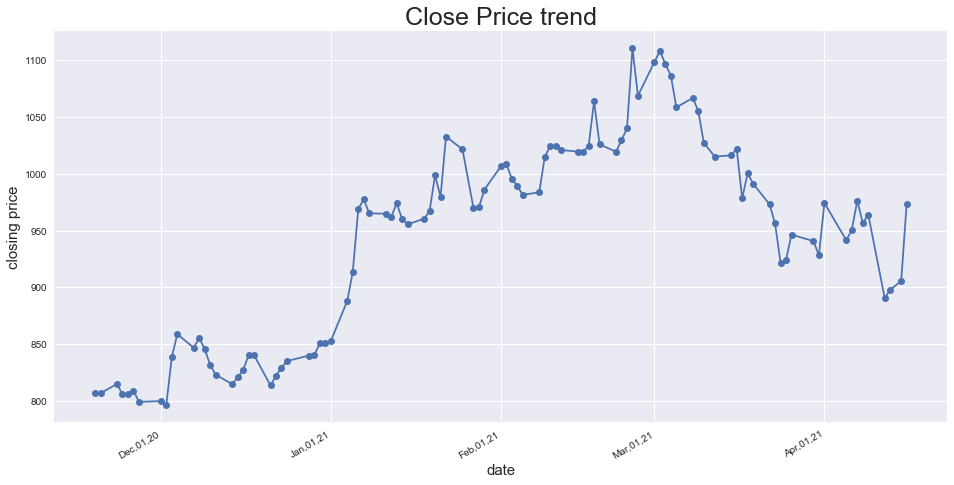

In [72]:
plt.figure(figsize=(16,8))
plt.style.use('seaborn')
plt.plot_date(DF['Date'],DF['Close*'], linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d,%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('Close Price trend',fontsize=25)
plt.xlabel('Date',fontsize=15)
plt.ylabel('closing price',fontsize=15)

In [73]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          100 non-null    datetime64[ns]
 1   Open          100 non-null    object        
 2   High          100 non-null    object        
 3   Low           100 non-null    object        
 4   Close*        100 non-null    float64       
 5   Adj. close**  100 non-null    object        
 6   Volume        100 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.6+ KB


In [76]:
DF.head()

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,2021-04-16,915.8,981.40,915.00,973.70,973.70,5937635.0
1,2021-04-15,900.5,909.80,883.35,905.55,905.55,1874017.0
2,2021-04-13,897.8,916.90,883.00,898.00,898.00,1682969.0
3,2021-04-12,931.0,944.85,885.00,890.45,890.45,2550147.0
4,2021-04-09,956.0,979.65,947.20,963.95,963.95,1979210.0


In [77]:
# tomorrows closing  price increse or decrease
# If tomorrows close price is > todays close price assign 1 else 0

In [80]:
DF['close_price_up']=np.where(DF['Close*'].shift(-1) > DF['Close*'],1,0)

In [82]:
DF.head(20)

,Date,Open,High,Low,Close*,Adj. close**,Volume,close_price_up
0,2021-04-16,915.80,981.40,915.00,973.70,973.70,5937635.0,0
1,2021-04-15,900.50,909.80,883.35,905.55,905.55,1874017.0,0
2,2021-04-13,897.80,916.90,883.00,898.00,898.00,1682969.0,0
3,2021-04-12,931.00,944.85,885.00,890.45,890.45,2550147.0,1
4,2021-04-09,956.00,979.65,947.20,963.95,963.95,1979210.0,0
5,2021-04-08,977.90,978.00,953.30,956.60,956.60,1244924.0,1
6,2021-04-07,946.00,982.80,935.75,976.30,976.30,2600202.0,0
7,2021-04-06,948.40,959.55,933.40,950.90,950.90,1081257.0,0
8,2021-04-05,979.00,979.00,912.20,941.35,941.35,2167884.0,1
9,2021-04-01,935.00,985.00,935.00,974.30,974.30,2082857.0,0


In [86]:
#split the data into Independent and dependent data set

X=DF.iloc[:,1:-1].values
Y=DF.iloc[:,-1].values

In [87]:
X

array([[9.1580000e+02, 9.8140000e+02, 9.1500000e+02, 9.7370000e+02,
        9.7370000e+02, 5.9376350e+06],
       [9.0050000e+02, 9.0980000e+02, 8.8335000e+02, 9.0555000e+02,
        9.0555000e+02, 1.8740170e+06],
       [8.9780000e+02, 9.1690000e+02, 8.8300000e+02, 8.9800000e+02,
        8.9800000e+02, 1.6829690e+06],
       [9.3100000e+02, 9.4485000e+02, 8.8500000e+02, 8.9045000e+02,
        8.9045000e+02, 2.5501470e+06],
       [9.5600000e+02, 9.7965000e+02, 9.4720000e+02, 9.6395000e+02,
        9.6395000e+02, 1.9792100e+06],
       [9.7790000e+02, 9.7800000e+02, 9.5330000e+02, 9.5660000e+02,
        9.5660000e+02, 1.2449240e+06],
       [9.4600000e+02, 9.8280000e+02, 9.3575000e+02, 9.7630000e+02,
        9.7630000e+02, 2.6002020e+06],
       [9.4840000e+02, 9.5955000e+02, 9.3340000e+02, 9.5090000e+02,
        9.5090000e+02, 1.0812570e+06],
       [9.7900000e+02, 9.7900000e+02, 9.1220000e+02, 9.4135000e+02,
        9.4135000e+02, 2.1678840e+06],
       [9.3500000e+02, 9.8500000e+02,

In [88]:
from sklearn.model_selection import train_test_split

In [98]:
#split the data into 80% training and 20% testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
DTREE=DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(X_train,Y_train)


In [106]:
print(DTREE.score(X_test,Y_test))

0.8


In [107]:
TREE_pred=DTREE.predict(X_test)
print(TREE_pred)
print(Y_test)

[0 0 0 0 0 1 0 0 0 1]
[1 0 0 0 0 1 1 0 0 1]
